In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import powerlaw

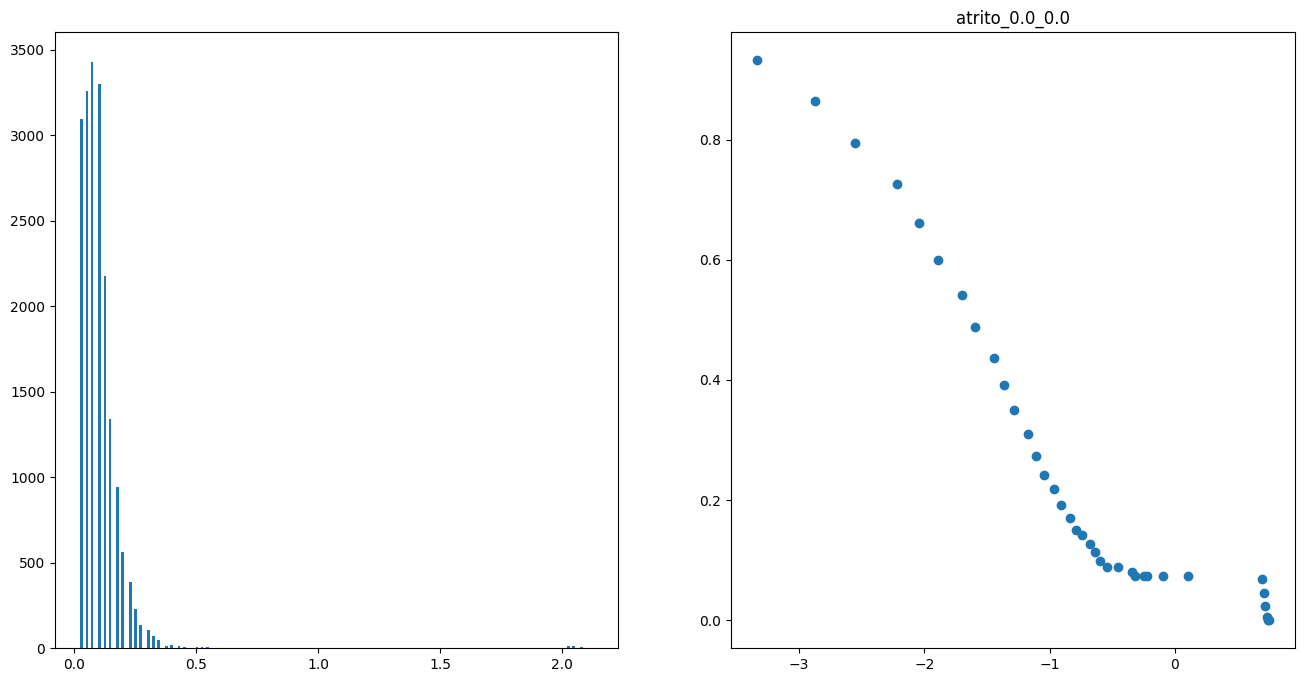

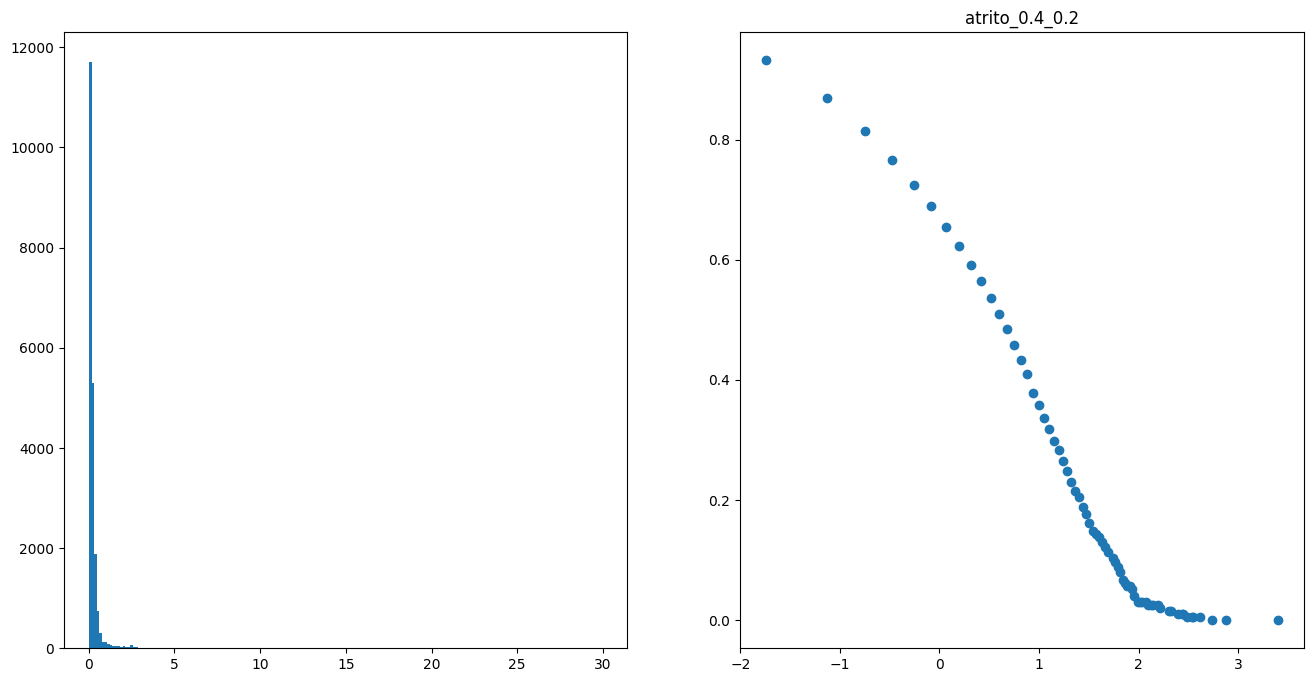

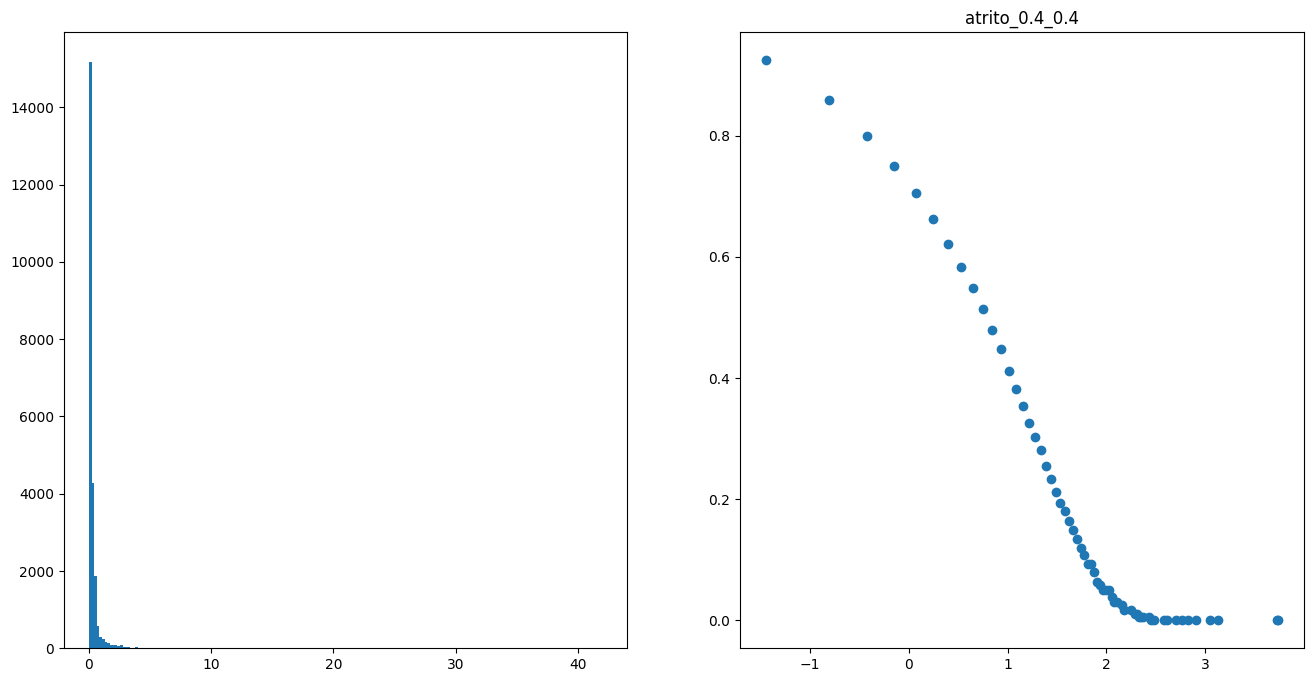

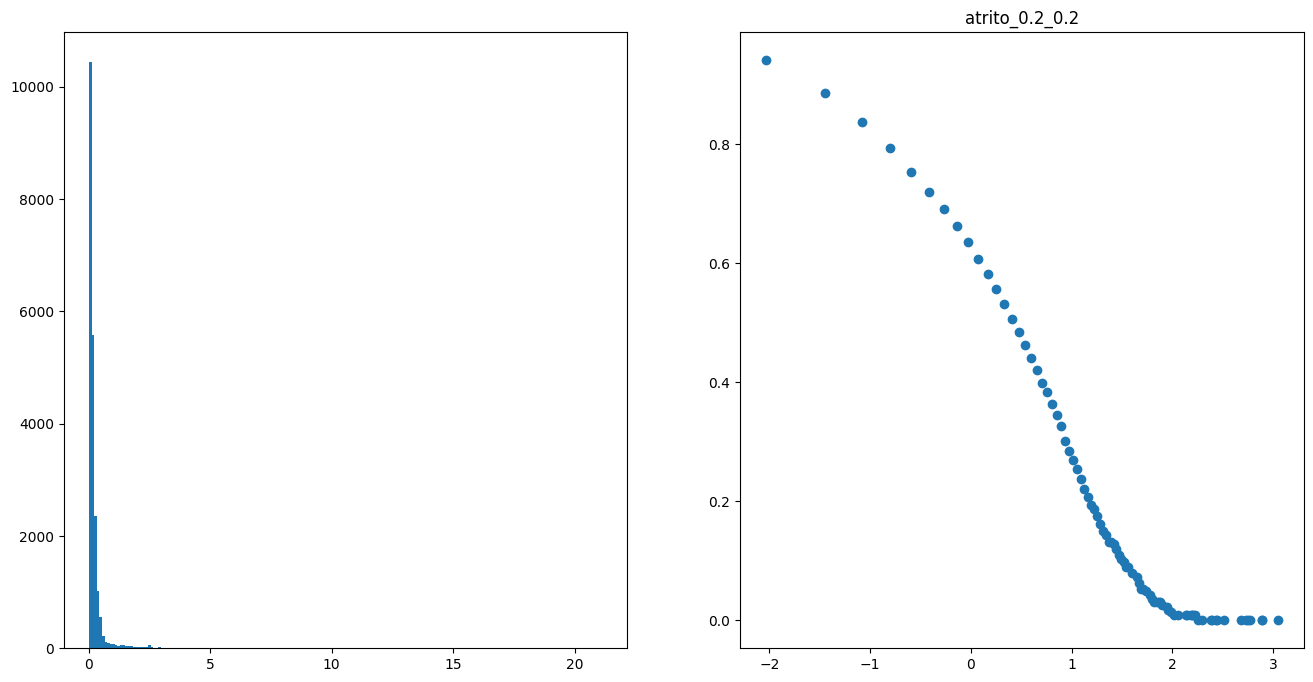

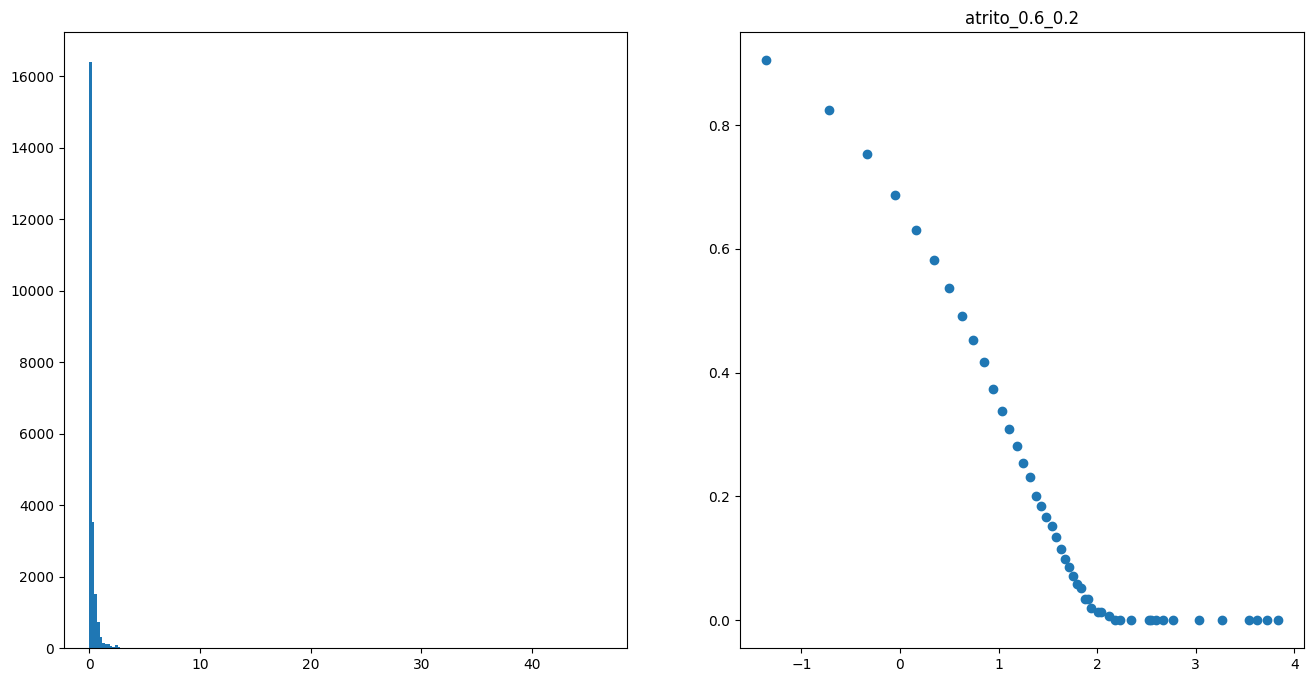

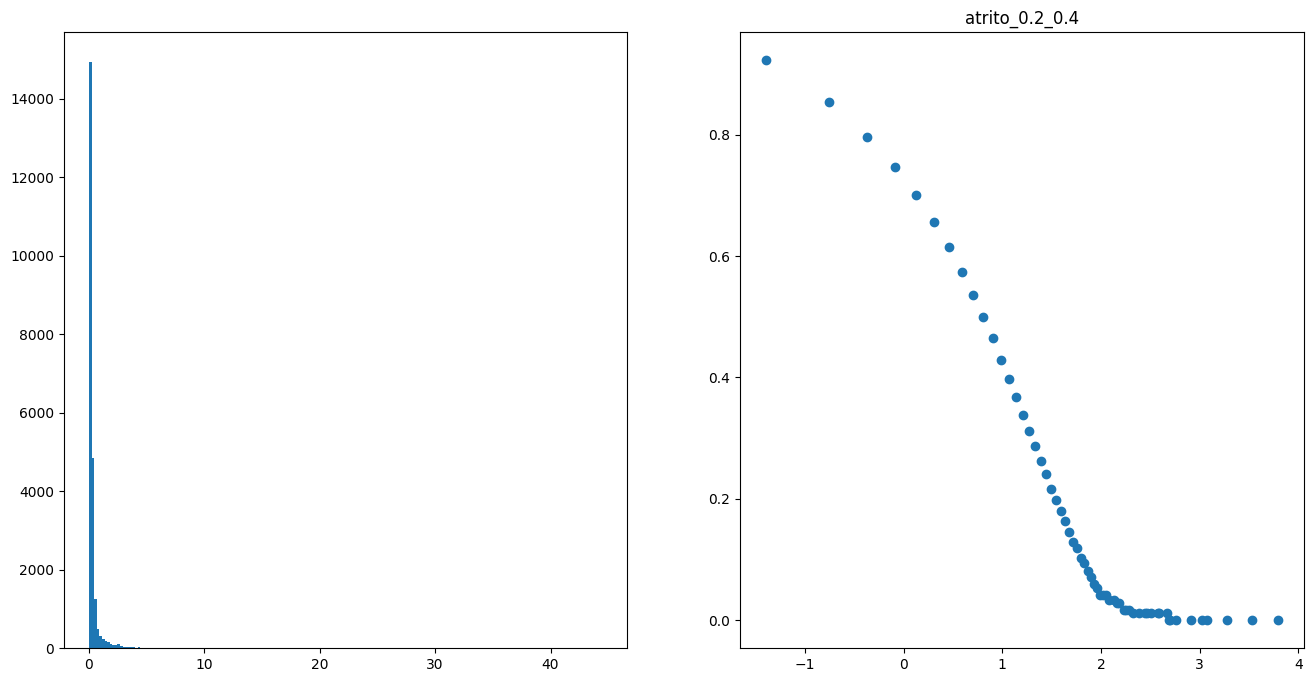

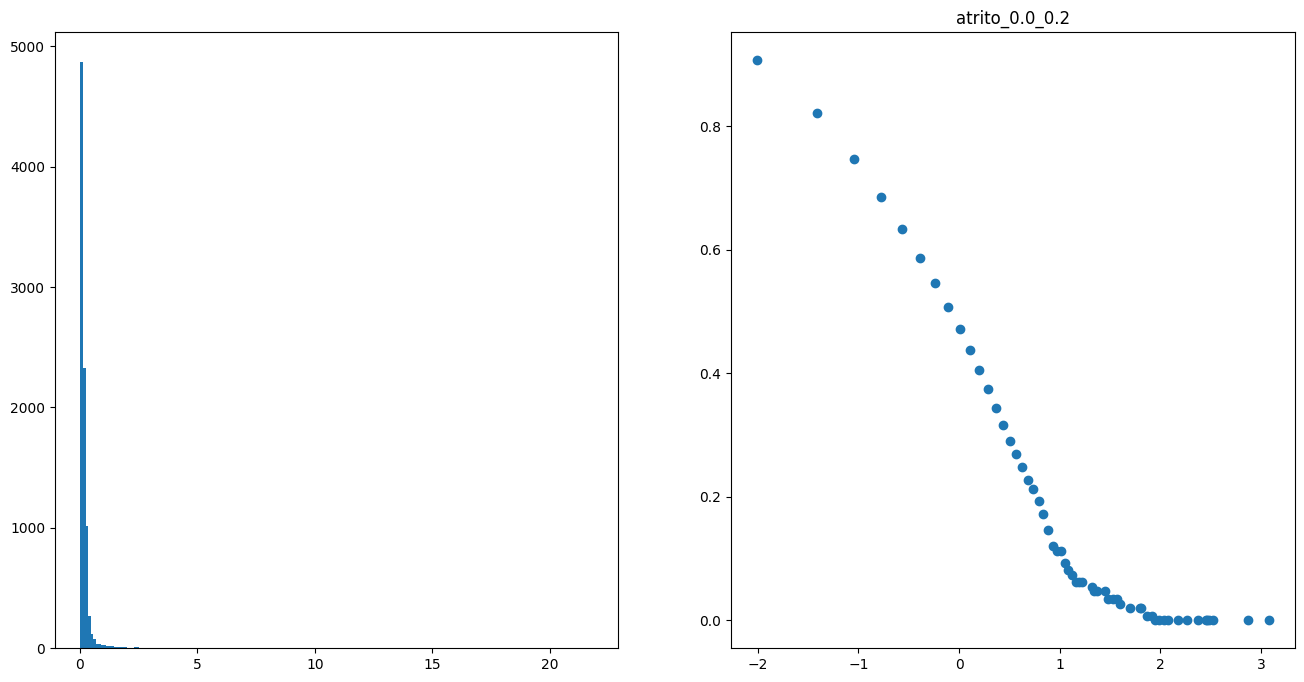

In [10]:
path = "./dados_silo_python/"
pastas = os.listdir(path)

for pasta in pastas:
    dados_concatenados = pd.DataFrame()
    for arquivo in os.listdir(os.path.join(path, pasta)):
        file_path = os.path.join(path, pasta, arquivo)
        dados = pd.read_csv(file_path, header=None, sep=" ", names=["time", "value"])
        dados['cumulative_time'] = dados['time'].cumsum()  # Acumular os tempos
        dados_concatenados = pd.concat([dados_concatenados, dados])

    # Plotar os gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    plt.title(pasta)

    # Histograma dos tempos
    times = dados_concatenados['time']
    hist_data = ax1.hist(times, bins=200)
    x = hist_data[1][1:]  # Coordenadas do bin
    y = hist_data[0]      # Alturas do histograma

    # Scatter plot dos dados logarítmicos
    x = x[y > 0]
    y = y[y > 0]
    y = np.log10(y) / np.sum(np.log10(y))
    y = np.cumsum(y)
    ax2.scatter(np.log(x), 1 - y)

    plt.show()